# **Project California Housing Prices Prediction**

# 1. Loading the Data Set
1. Changing the directory for easy access of file we will be importing
2. Importing required libraries
3. Loading the dataset

In [ ]:
import os
os.getcwd()
os.chdir('/content/drive/MyDrive/Data_Science & Machine_Learning/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
df= pd.read_csv('Housing_pricing.csv')
print(df.head())
print("\nDataset Shape:", df.shape)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Dataset Shape: (20640, 10)


* Importing all the libraries that we are going to use.
* Changing directory to easy access the data.
* Printing the first 5 rows and the shape of data set before data cleaning

#2. Statistical Description
1. Displaying the statistical description of dataset
2. Check Missing values and dtypes
3. Check Missing values
4. Dataset Shape


In [ ]:
# Calculate and display the training data
print("Statistical Desription of Dataset:\n")
print(df.describe())
print("\nCheck Missing values and dtypes:\n")
print(df.info())
print("\nCheck Missing values:\n")
print (df.isna().sum())
print("\nDataset Shape:", df.shape)

Statistical Desription of Dataset:

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000   



* Checking the statistical descrip tion of data set for example mean, max, min cout etc.
* Using info() checking the datatype, to see if there are any missing values and the size of data set
* Using isna().sum() to check the total number of missing values in the data set in this dataset in total_bedrooms column we have 207 missing values.


#3. Data Preprocessing
1. Remove any rows with missing information.
2. Remove all duplicate rows.
3. Hot encoding to change the categorical columns to boolean values
4. Shuffle the data and split it into training (80%) and test (20%) sets

In [ ]:
# Removing any rows with missing data
df.dropna(inplace=True)

# Remove all duplicate rows
df.drop_duplicates(inplace=True)

# Hot encoding
data_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
print(data_encoded.head())

# Spilitting the data
X = data_encoded.drop('median_house_value', axis=1)
y = data_encoded['median_house_value']

# 80% Training, 20% Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Dataset Shape after Data Cleaning:", df.shape)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                   False                      True   
1     

* As we had missing values in our data removed them to clean our dataset.
* Remove any duplicates that are available in data set
* Hot encoding categorical values to binary values in this case we only have 1 such column
* Splitting the data in 80% training and 20% testing data.
* Print the number of rows are rows after cleaning the data.

# Corelation with Target Variable
1. Calculating corelation of feature with target variable

In [58]:
# Now calculating correlations
correlation_matrix = df_encoded.corr()
print("Correlation with Target:")
print(correlation_matrix['median_house_value'].sort_values(ascending=False))

Correlation with Target:
median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64


* So the correaltion tells us how the target value in relation to features for example if one increases the other decreases or increases or remain same.  Positive Correlation when one variable increases, the other also increases. Negative Correlation when one variable increases, the other decreases. 0 means there is no relation.

#4. Simple Linear Regression
1. Train model on Training Dataset
2. Prediction on Test Dataset
3. Calculating error

In [ ]:
# Model Training on train data
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
# Prediction on test data
y_pred_lr = model_lr.predict(X_test)
#Calculating error
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print("Mean Squared Error:", mse_lr)
print("Mean Absolute Error:", mae_lr)

Mean Squared Error: 4802173538.60416
Mean Absolute Error: 50413.4333081006


* Simple Linear regression training the model and testing on test data and calculating error.

#5. Lasso & Ridge
1. Calculating the Best alpha value for Ridge & Lasso

In [ ]:
# 80% Training, 10% Validation, 10% Test
X_train, X_temp, y_train, y_temp = train_test_split(X, y,test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp, test_size=0.5, random_state=42)

# Lasso
alpha_lasso = [0.01, 2.5, 1, 10, 100]
best_alpha_lasso = None
best_mae_lasso = float('inf')
# Train a Lasso regression model
for a in alpha_lasso:
  lasso_model = Lasso(alpha=a)
  lasso_model.fit(X_train, y_train)
 # Predict and evaluate on validation data
  y_pred_lasso = lasso_model.predict(X_val)
  mae_lasso = mean_absolute_error(y_val, y_pred_lasso)
  print(f'Lasso Regression - Alpha: {a} | MAE: {mae_lasso:.2f}')
  if mae_lasso < best_mae_lasso:
    best_mae_lasso = mae_lasso
    best_alpha_lasso = a
print(f'Best Alpha For Lasso: {best_alpha_lasso}\n')

# Ridge
alpha_ridge = [0.01, 2.5, 1, 10, 100]
best_alpha_ridge = None
best_mae_ridge = float('inf')
# Train a Ridge regression model
for a in alpha_ridge:
  ridge_model = Ridge(alpha=a)
  ridge_model.fit(X_train, y_train)
  # Predict and evaluate on validation data
  y_pred_ridge = ridge_model.predict(X_val)
  mae_ridge = mean_absolute_error(y_val, y_pred_ridge)
  print(f'Ridge Regression - Alpha: {a} | MAE: {mae_ridge:.2f}')
  if mae_ridge < best_mae_ridge:
    best_mae_ridge = mae_ridge
    best_alpha_ridge = a
print(f'Best Alpha For Ridge: {best_alpha_ridge}')

# Lasso Model train using best alpha
lasso_model = Lasso(alpha=best_alpha_lasso)
lasso_model.fit(X_train, y_train)
# Predict and evaluate on test data
y_pred_lasso = lasso_model.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'\nLasso Regression with best alpha value - MAE : {mae_lasso:.2f}')
print(f'Lasso Regression with best alpha value - MSE : {mse_lasso:.2f}\n')

# Ridge Model train using best alpha
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train, y_train)
# Predict and evaluate on test data
y_pred_ridge = ridge_model.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression with best alpha value - MAE : {mae_ridge:.2f}')
print(f'Ridge Regression with best alpha value - MSE : {mse_ridge:.2f}')

Lasso Regression - Alpha: 0.01 | MAE: 49564.91
Lasso Regression - Alpha: 2.5 | MAE: 49558.93
Lasso Regression - Alpha: 1 | MAE: 49562.53
Lasso Regression - Alpha: 10 | MAE: 49540.92
Lasso Regression - Alpha: 100 | MAE: 49498.04
Best Alpha For Lasso: 100

Ridge Regression - Alpha: 0.01 | MAE: 49564.63
Ridge Regression - Alpha: 2.5 | MAE: 49524.21
Ridge Regression - Alpha: 1 | MAE: 49542.56
Ridge Regression - Alpha: 10 | MAE: 49495.67
Ridge Regression - Alpha: 100 | MAE: 49501.15
Best Alpha For Ridge: 10

Lasso Regression with best alpha value - MAE : 51256.61
Lasso Regression with best alpha value - MSE : 5015963085.50

Ridge Regression with best alpha value - MAE : 51231.55
Ridge Regression with best alpha value - MSE : 5013398826.88


* Splitting the data set in training, validate and testing
* For ridge and lasso slecting different penalty values to choose the best.
* Trainig model on each penalty and then predicting on validate dataset to check which penalty gives least error.
* Choosing best penalty to make prediction on test data
* For ridge alpha 10 and lasso alpha 100 give the least mae value
* Ridge regression adds an L2 regularization penalty to the linear regression cost function, which reduces coefficient size but does not set any of them exactly to zero
* Lasso regression adds an L1 regularization penalty to the linear regression cost
function, which helps reduce model complexity and performs feature selection by
shrinking some coefficients to zero

#7. Elastic Net Regression
1. Train model on Training Dataset
2. Prediction on Test Dataset
3. Calculating error

In [ ]:
# 80% Training, 20% Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train an Elastic Net model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5) # l1_ratio balances L1 and L2
elastic_net_model.fit(X_train, y_train)
# Predict and evaluate
y_pred_enet = elastic_net_model.predict(X_test)
mse_enet = mean_squared_error(y_test, y_pred_enet)
mae_enet = mean_absolute_error(y_test, y_pred_enet)
print(f'Elastic Net - MSE: {mse_enet:.2f}')
print(f'Elastic Net - MAE: {mae_enet:.2f}')

Elastic Net - MSE: 4805532994.93
Elastic Net - MAE: 50452.05


* For Elasticnet Regression we can change Hyperparameters.
* Elastic Net combines both L1 and L2 regularization penalties, balancing
feature selection (L1) and coefficient shrinkage (L2)

#8. Gradient Boosting Regressor
1. Using GridSearchCV to find the best combination of hyperparameters to tune model
2. Train model on Training Dataset
3. Prediction on Test Dataset
4. Calculating error

In [ ]:
from sklearn.model_selection import GridSearchCV
# 80% Training, 20% Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5]
}

# Initialize model and grid search
gb = GradientBoostingRegressor()
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Minimize MSE
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all CPU cores
)

# Fit grid search to training data
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {best_params}")

# Evaluate on test set
y_pred_gb = best_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f'Gradient Boosting Regressor - MSE: {mse_gb:.2f}')
print(f'Gradient Boosting Regressor - MAE: {mae_gb:.2f}')

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Gradient Boosting Regressor - MSE: 2282040699.93
Gradient Boosting Regressor - MAE: 31709.05


* Using GridSearchCV to find best possible combination for hyperparameter for tuning. GridSearchCV will train this model multiple times with different combinations of hyperparameters.
1. estimator=gb The model to be optimized it's a GradientBoostingRegressor().
2. param_grid=param_grid GridSearch will try every combination of these, i.e., 3 x 3 x 3 = 27 combinations.
3. scoring='neg_mean_squared_error' Defines how model performance is evaluated Here it uses the negative MSE because higher scores are better by default in sklearn, so negative MSE lets us minimize MSE.
4. cv=5 This sets the number of cross-validation folds. In each run, the data is split into 5 parts: 4 for training, 1 for validation, repeated 5 times.
5. n_jobs=-1 Tells GridSearchCV to use all available CPU cores for parallel processing, speeding up the search

* Implementing the Gradient Boosting Regressor on Training Data Set and then predicting on Test Data. Gradient Bossting Regressor have parameters
1. n_ estimators tell us the number of trees that the model will build. In Gradient Boosting we combine many trees or weak learners to build strong model to read complex pattern. Each tree corrects the error from previous one.
More n_estimators means can read complex pattern but risk of overfitting.
2. learning rate is the step size towards the gradient, the contribution of each tree towards the end result. While selecting learning rate we should keep in mind the n_estimators because there is a trade off between them. Usually low learinig rate can give a generalize result but for better result we should increase number of trees. High learning rate can lead to more error.
3. max_depth defines that each tree is how many sets. It defines how many part each tree is split. High depth can read complex pattern but risk of overfitting.

#9. MLPRegressor for Regression
1. Train model on Training Dataset
2. Prediction on Test Dataset
3. Calculating error

In [60]:
# Initialize, train, and test model
model_mlp = MLPRegressor(hidden_layer_sizes=(10,5), max_iter=5000, random_state=42)
model_mlp.fit(X_train, y_train)
y_pred_mlp = model_mlp.predict(X_test)
# Evaluate error
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
print(f"MLP Regressor - MSE: {mse_mlp:.2f}")
print(f"MLP Regressor - MAE: {mae_mlp:.2f}")

MLP Regressor - MSE: 4356657114.69
MLP Regressor - MAE: 47548.44


* Implementing the MLP Regressor on Training Data Set and then predicting on Test Data. MLP Regressor have parameters
1. hidden_layer_size this parameter defines the architecture of neural network, how many neurons and how many hidden layers, in this case there is 1 layer with 10 neurons and other hidden layer with 5 neurons. Increasing neurons and layers might help to capture complex patterns but if the data set is small more neurons and hidden layer might lead to overfitting.
2. max-iter defines the number of iteration the training algorith will run while trying to find the best weights. The algo can run maximum number defined however if it converges means the change is negligible it will stop early before reaching maximum iteration. If max iter are too low the algorithm will not train porperly and the error will be huge.


#10. Support Vector Regression
1. Train model on Training Dataset
2. Prediction on Test Dataset
3. Calculating error

In [65]:
svr_linear = SVR(kernel='linear', C=100, epsilon=0.1)
svr_linear.fit(X_train, y_train)
# Predict on the test set
y_pred_svr = svr_linear.predict(X_test)
# Calculate MSE and MAE
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print(f'SVR (Linear Kernel) - MSE: {mse_svr:.2f}')
print(f'SVR (Linear Kernel) - MAE: {mae_svr:.2f}')

SVR (Linear Kernel) - MSE: 5020627506.08
SVR (Linear Kernel) - MAE: 49231.96


* Training the model and predicting on test data. There are hyperparameters of SVR which we can tune to improve our results.
1. kernel defines what type to data pattern we want to capture rbf is used to capture non-linear data, linear can capture linear pattern in data set.
2. C is the regularization parameter which control the trade off between model complexity and error. Smaller C for simpler models which have low tolerence for error, while large value of minimizes the training error but have the risk of overfitting.
3. epsilon is the margin for no error penalty for example if epsilon is 0.1 and our Actual value is 10 and Predicted value is 10.08 so we have a margin of +- 0.1 and no loss will be counted.

# Plot Comparison of MAE
1. Plotting the values of MAE for all models to compare which performed well

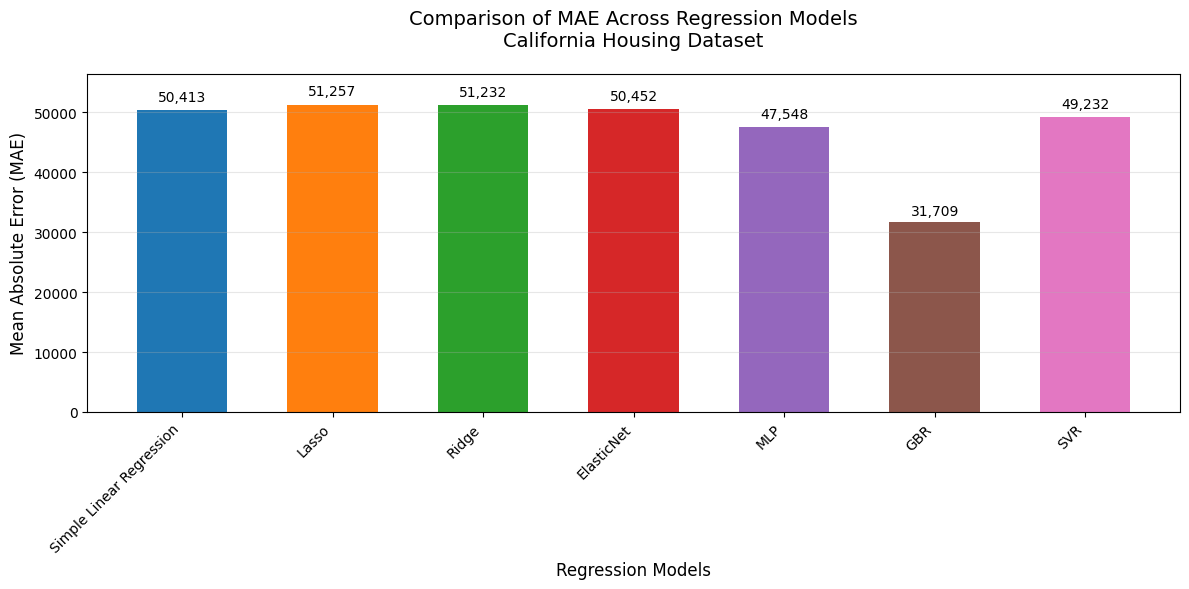

In [66]:
import matplotlib.pyplot as plt
# MAE values
mae_values = {
    "Simple Linear Regression": mae_lr,
    "Lasso": mae_lasso,
    "Ridge": mae_ridge,
    "ElasticNet": mae_enet,
    "MLP": mae_mlp,
    "GBR": mae_gb,
    "SVR": mae_svr
}

# Extract labels and values
models = list(mae_values.keys())
mae_scores = list(mae_values.values())

# Plot settings
plt.figure(figsize=(12, 6))
colors = plt.cm.tab10.colors  # Use a color map for consistent colors
bar_width = 0.6

# Create bar plot
bars = plt.bar(models, mae_scores, color=colors[:len(models)], width=bar_width)

# Customize plot
plt.xlabel("Regression Models", fontsize=12)
plt.ylabel("Mean Absolute Error (MAE)", fontsize=12)
plt.title("Comparison of MAE Across Regression Models\nCalifornia Housing Dataset", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Set dynamic y-axis limits
max_mae = max(mae_scores)
plt.ylim(0, max_mae * 1.1)  # Add 10% padding

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.,
             height * 1.02,
             f'{height:,.0f}',
             ha='center',
             va='bottom',
             fontsize=10)

plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

* As we can see clearly for Gradient Boosting perform the best for the given data set having the minimum MAE.
* We can always tune our hyperparamters to make model good fit.

# Plot Comparison of MSE
1. Plotting the values of MSE for all models to compare which performed well

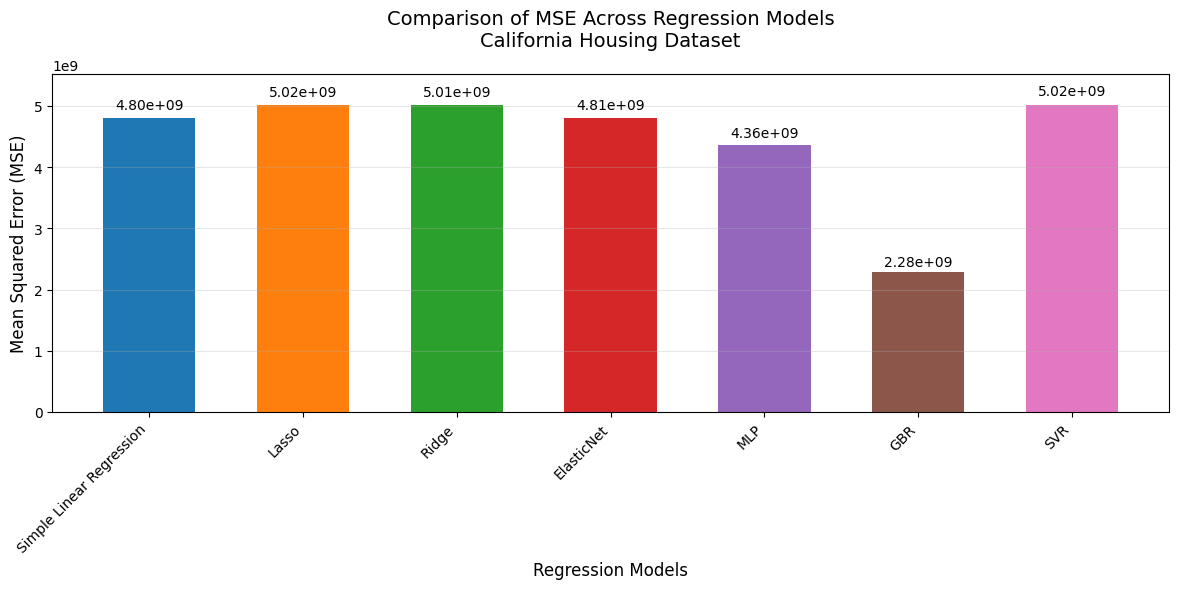

In [67]:
# MSE values
mse_values = {
    "Simple Linear Regression": mse_lr,
    "Lasso": mse_lasso,
    "Ridge": mse_ridge,
    "ElasticNet": mse_enet,
    "MLP": mse_mlp,
    "GBR": mse_gb,
    "SVR": mse_svr
}
# Extract labels and values
models = list(mse_values.keys())  # Changed from mae_values to mse_values
mse_scores = list(mse_values.values())  # Changed variable name

# Plot settings
plt.figure(figsize=(12, 6))
colors = plt.cm.tab10.colors
bar_width = 0.6

# Create bar plot
bars = plt.bar(models, mse_scores, color=colors[:len(models)], width=bar_width)  # Changed to mse_scores

# Customize plot
plt.xlabel("Regression Models", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)  # Updated label
plt.title("Comparison of MSE Across Regression Models\nCalifornia Housing Dataset", fontsize=14, pad=20)  # Updated title
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Set dynamic y-axis limits
max_mse = max(mse_scores)
plt.ylim(0, max_mse * 1.1)

# Add value labels on bars with scientific notation
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.,
             height * 1.02,
             f'{height:.2e}',  # Scientific notation for MSE values
             ha='center',
             va='bottom',
             fontsize=10)

plt.tight_layout()
plt.show()

* As we can see clearly for Gradient Boosting perform the best for the given data set having the minimum MSE.
* We can always tune our hyperparamters to make model good fit.

# Table Comparison of MSE and MAE of Models
1. The values of MSE and MAE for all models to compare which performed well

In [68]:
# Combine into a single dictionary
metrics = {
    model: {"MAE": mae_values[model], "MSE": mse_values[model]}
    for model in mae_values.keys()
}

# Create DataFrame and sort by MSE
results_df = pd.DataFrame(metrics).T.sort_values(by="MSE")

# Format for readability
styled_df = results_df.style.format({
    "MAE": "{:,.0f}",    # Format MAE as integer with commas
    "MSE": "{:.2e}"       # Format MSE in scientific notation
}).background_gradient(subset=["MAE", "MSE"], cmap="YlGn_r")  # Color coding

# Display the table
styled_df

,MAE,MSE
GBR,"31,709",2.28e+09
MLP,"47,548",4.36e+09
Simple Linear Regression,"50,413",4.80e+09
ElasticNet,"50,452",4.81e+09
Ridge,"51,232",5.01e+09
Lasso,"51,257",5.02e+09
SVR,"49,232",5.02e+09


* Gradient Boosting performed the best while we can perform tuning of hyperparameters to make model good fit

# Actual vs Predicted Values
1. Using matplotlib to plot the actual and predicted values for all models

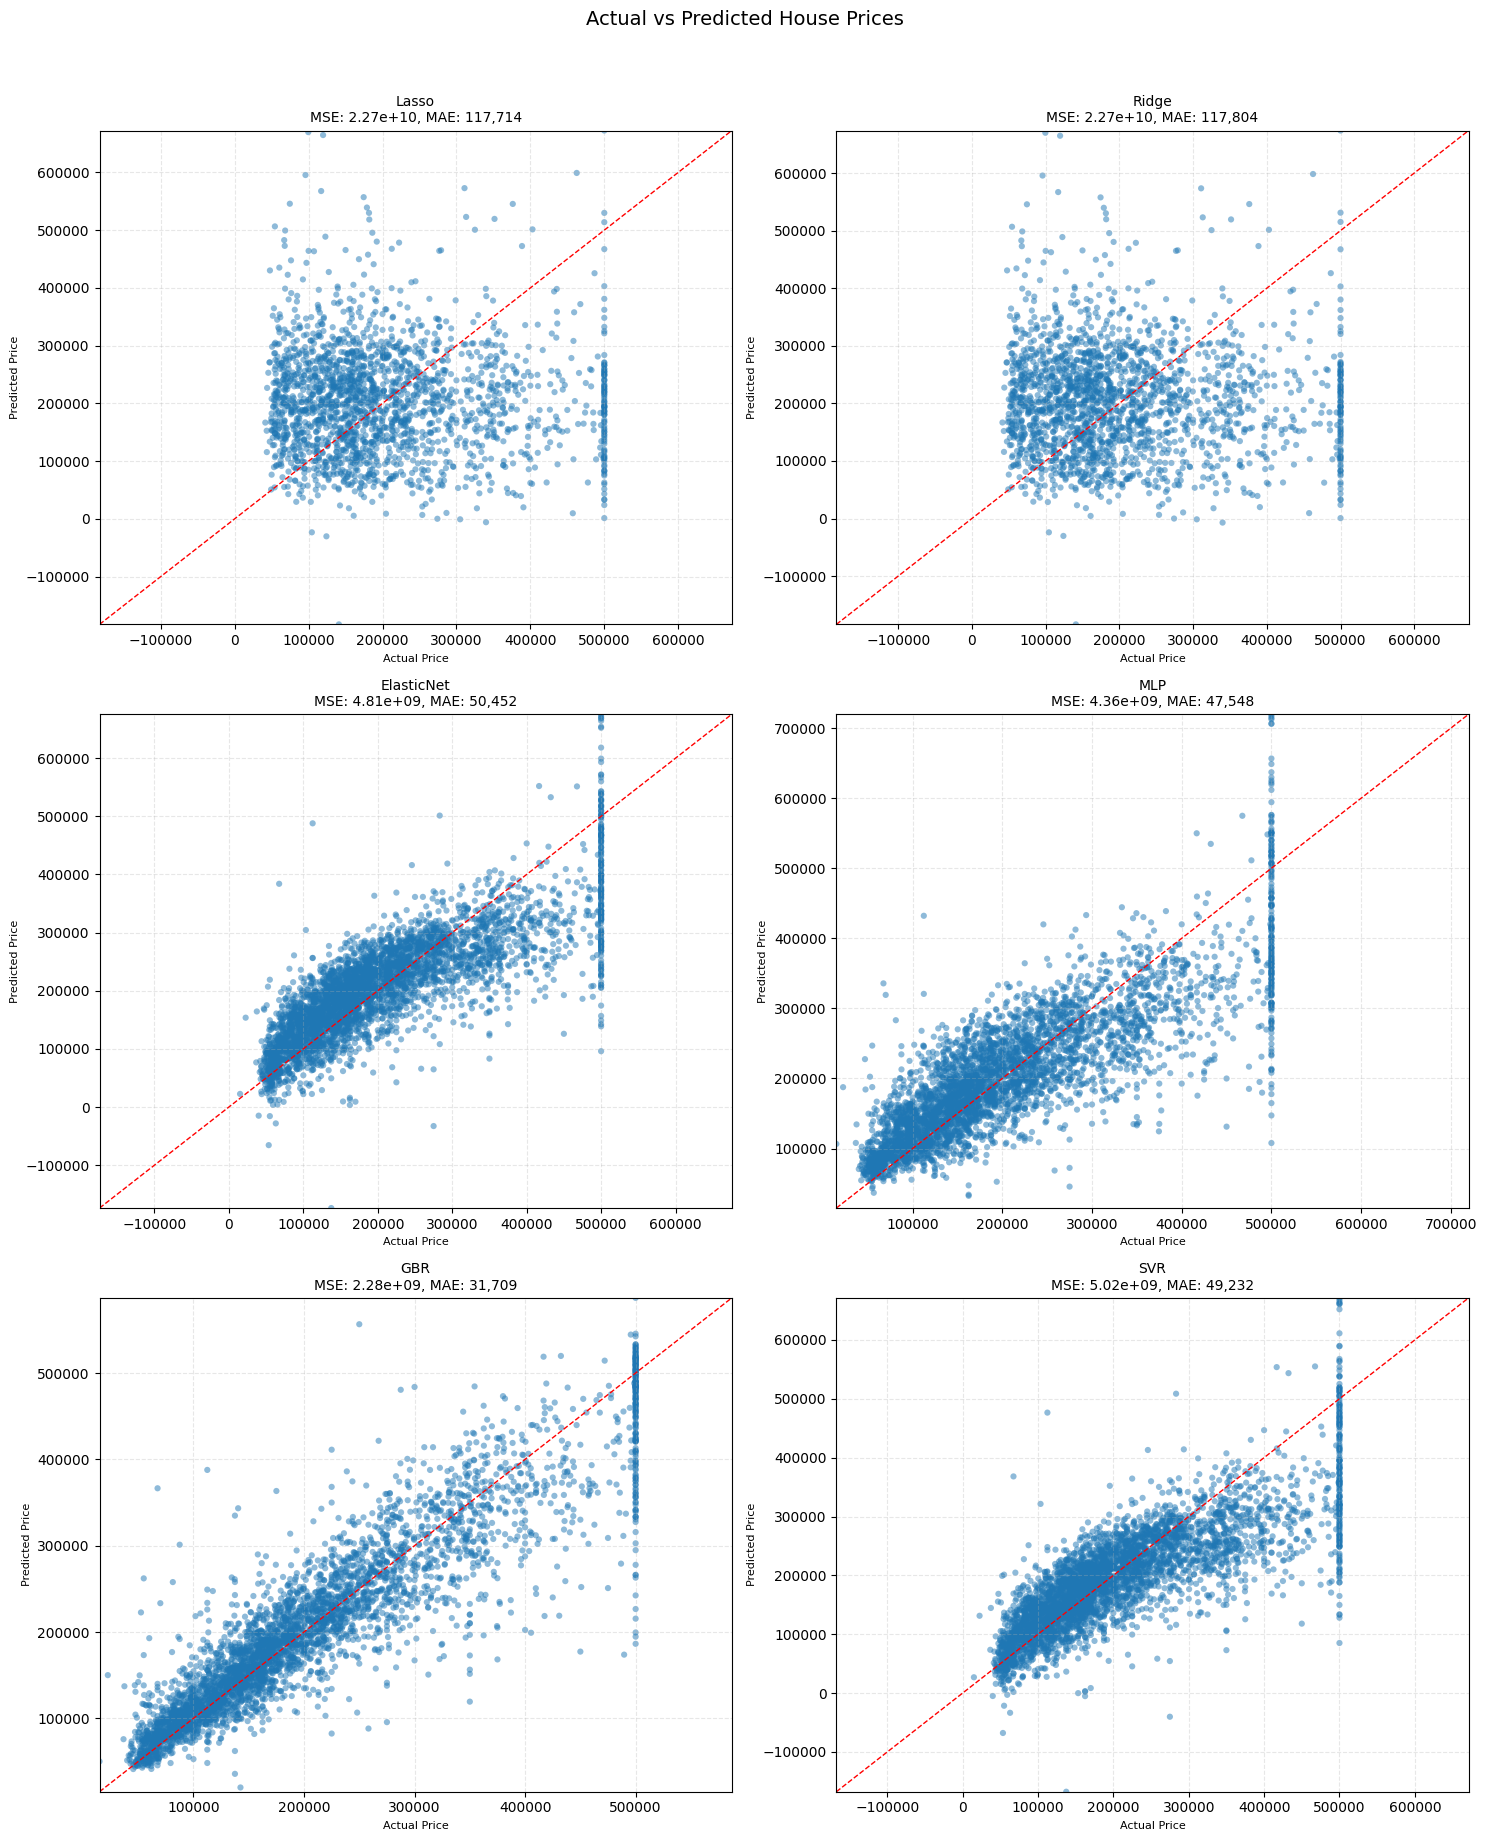

In [69]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual predictions)
models = {
    "Lasso": y_pred_lasso,
    "Ridge": y_pred_ridge,
    "ElasticNet": y_pred_enet,
    "MLP": y_pred_mlp,
    "GBR": y_pred_gb,
    "SVR": y_pred_svr
}

# Create subplots with 2 plots per row
n_models = len(models)
n_rows = (n_models + 1) // 2  # Calculate rows needed
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 6*n_rows))
axes = axes.flatten()

# Plot settings
plt.suptitle("Actual vs Predicted House Prices", fontsize=14, y=1.02)

# Plot for each model
for idx, (model_name, y_pred) in enumerate(models.items()):
    ax = axes[idx]

    # Scatter plot with matching indices
    ax.scatter(y_test[:len(y_pred)], y_pred, alpha=0.5, s=20, edgecolors='none')

    # Perfect prediction line
    global_min = min(y_test.min(), y_pred.min())
    global_max = max(y_test.max(), y_pred.max())
    ax.plot([global_min, global_max], [global_min, global_max], 'r--', lw=1)

    # Set axis limits
    ax.set_xlim(global_min, global_max)
    ax.set_ylim(global_min, global_max)

    # Calculate metrics
    mse = mean_squared_error(y_test[:len(y_pred)], y_pred)
    mae = mean_absolute_error(y_test[:len(y_pred)], y_pred)

    # Title with metrics
    ax.set_title(f"{model_name}\nMSE: {mse:.2e}, MAE: {mae:,.0f}", fontsize=10)
    ax.set_xlabel("Actual Price", fontsize=8)
    ax.set_ylabel("Predicted Price", fontsize=8)
    ax.grid(True, linestyle='--', alpha=0.3)

# Hide empty subplots
for idx in range(len(models), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

* Blue Dots	represent Individual house predictions (1 dot = 1 house)
* Red Dashed Line	Perfect prediction line (where predicted price = actual price)
* X-axis (Actual)	True house prices from dataset (in dollars)
* Y-axis (Predicted)	Model's guessed prices (in dollars)